# Diverging Bar Chart


['E' 'L' 'S' 'Z' 'A' 'H' 'O' 'V' 'B' 'G' 'N' 'U' 'F' 'M' 'T' 'C' 'J' 'Q'
 'X' 'D' 'K' 'R' 'Y' 'I' 'P' 'W']
[ 2.    2.    2.    2.    1.86  1.86  1.86  1.86  1.58  1.36  1.36  1.36
 -1.24 -1.24 -1.24 -1.5  -1.5  -1.5  -1.5  -1.54 -1.54 -1.54 -1.54 -1.58
 -1.58 -1.58]


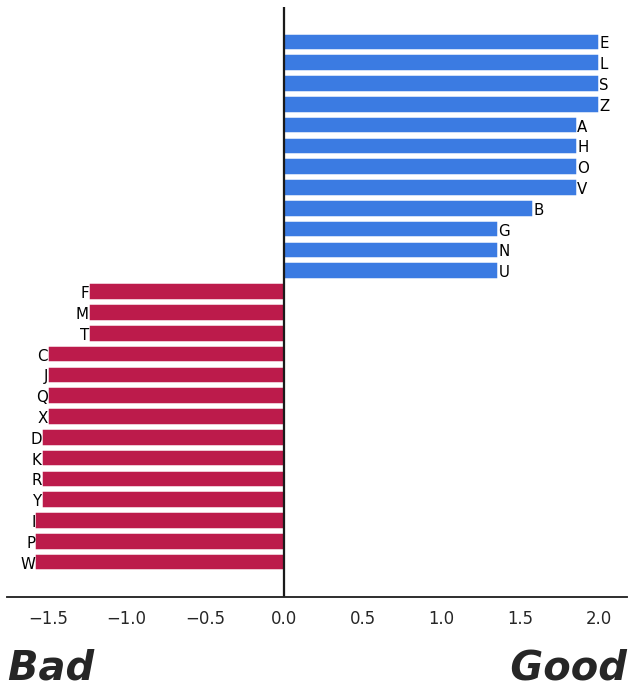

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {'A' : 1.86, 'B' : 1.58, 'C' : -1.50, 'D': -1.54, 'E':2.00, 'F':-1.24, 'G':1.36, 'H' : 1.86, 'I' : -1.58, 'J' : -1.50, 'K': -1.54, 'L':2.00, 'M':-1.24, 'N':1.36, 'O' : 1.86, 'P' : -1.58, 'Q' : -1.50, 'R': -1.54, 'S':2.00, 'T':-1.24, 'U':1.36, 'V' : 1.86, 'W' : -1.58, 'X' : -1.50, 'Y': -1.54, 'Z':2.00}
data = dict(sorted(data.items(), key = lambda x : x[1], reverse = True))
sr = pd.Series(data)


sns.set_theme(style="white", context="talk")
# Set up the matplotlib figure
f, ax = plt.subplots(1,1,figsize=(10, 10), sharex=True)

# Generate some sequential data
y = np.array(list(sr.index))
x = sr.values
print(y)
print(x)
cols = ['#1F75FE' if (i > 0) else '#D70040' for i in x]

sns.barplot(x=x, y=y, ax=ax, palette=cols, orient = 'h')

ax.axvline(0, color="k", clip_on=True)
ax.set_xlabel(xlabel="Bad"+' '*30+"Good", fontsize=40, labelpad = 20.0, ha = 'center', style ='oblique',weight=1000)
ax.axes.yaxis.set_ticklabels([])
# Finalize the plot
sns.despine(bottom=False, left = True)
plt.setp(ax.axes, xticks =[-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0])
plt.tight_layout(h_pad=2)


line_graph = plt.scatter(x, y, color = '#FFFFFF')
for i, v in enumerate(x):
    if v < 0:
      plt.text(v, y[i], y[i],                 
                fontsize = 15, 
                color='black',
                ha = 'right',
                va = 'center_baseline')
    else :
      plt.text(v, y[i], y[i],                 
                fontsize = 15, 
                color='black',
                ha = 'left',
                va = 'center_baseline')



In [20]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt

def rescale_score_by_abs (score, max_score, min_score):
 
    if max_score>0 and min_score<0:
    
        if max_score >= abs(min_score):   # deepest color is positive
            if score>=0:
                return 0.5 + 0.5*(score/max_score)
            else:
                return 0.5 - 0.5*(abs(score)/max_score)

        else:                             # deepest color is negative
            if score>=0:
                return 0.5 + 0.5*(score/abs(min_score))
            else:
                return 0.5 - 0.5*(score/min_score)   
        
    elif max_score>0 and min_score>=0: 
        if max_score == min_score:
            return 1.0
        else:
            return 0.5 + 0.5*(score/max_score)

    elif max_score<=0 and min_score<0: 
        if max_score == min_score:
            return 0.0
        else:
            return 0.5 - 0.5*(score/min_score)    
  
      
def getRGB (c_tuple):
    return "#%02x%02x%02x"%(int(c_tuple[0]*255), int(c_tuple[1]*255), int(c_tuple[2]*255))
     
def span_word (word, abs_score, score, colormap):
    if score > -0.2 and score < 0.2  :
      return "<span style=\"color:"+"#000000"+"; font-size:"+str(20)+"pt\">"+word+"</span>"
    else:
      x = 0.7
      if abs_score > 0.5 :
          abs_score = abs_score * x + (1.0-x)
      else :
          abs_score = abs_score * x 
      return "<span style=\"color:"+getRGB(colormap(abs_score))+"; font-size:"+str(30)+"pt\">"+word+"</span>"


def html_heatmap (words, scores, cmap_name="bwr"):
    
    colormap  = plt.get_cmap(cmap_name).reversed()
     
    assert len(words)==len(scores)
    max_s     = max(scores)
    min_s     = min(scores)
    
    output_text = ""
    
    for idx, w in enumerate(words):
        abs_score       = rescale_score_by_abs(scores[idx], max_s, min_s)
        output_text = output_text + span_word(w, abs_score, scores[idx], colormap) + " "
    
    return output_text + "\n"



In [21]:
words = 'One of the best books I have ever read.  The message is deep wisdom that our government leaders and makers of US foreign policy would do well to internalize. Your kids will like it too.'.split()
score = [0,0,0,0,0.99,0,0,0,0,-0.99,0,0,0,0.5,0,0,0,0,0,-0.5,0,0,0,0,0.1,0,-0.1,0,0,0,0,0,0,0,0]

print(len(words))
print(len(score))

35
35


In [22]:
display(HTML(html_heatmap(words, score))) 
display(HTML(html_heatmap(words, score))) 
display(HTML(html_heatmap(words, score))) 
display(HTML(html_heatmap(words, score))) 
display(HTML(html_heatmap(words, score))) 
display(HTML(html_heatmap(words, score))) 
display(HTML(html_heatmap(words, score))) 
display(HTML(html_heatmap(words, score))) 
display(HTML(html_heatmap(words, score))) 

In [5]:
# drive mount. colab에 내 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [23]:
def combine_subtokens(tokens, relevance_score):
    '''
    combine subtokens to one word
    '''

    token = ['[CLS]', '[SEP]', '[MASK]', '[UNK]', '[PAD]']

    word, score, num = [], [], []

    for i in range(len(tokens)):
      if tokens[i] in token: continue
      if tokens[i][0]=='#':
        word[-1]+=tokens[i][2:]
        score[-1]+=relevance_score[i]
        num[-1]+=1
      else:
        word.append(tokens[i])
        score.append(relevance_score[i])
        num.append(1)
    
    for i in range(len(word)): score[i]/=num[i]
    
    return word, score


def visualize_expl(visualization_num):
  # record가 파일 경로일 경우 불러오기
  data1 = np.load("/content/drive/MyDrive/CS470_team_2in1/colab/explanation/only1000model/amazon_book_expl-transformer_attribution-binaryclassification_only10000.npy", allow_pickle=True)
  for i in range(visualization_num):
    tokens, rating, product, output, neg_expl, pos_expl, true_class, pred_class = data1[i]
    pos_expl /= np.linalg.norm(pos_expl)
    neg_expl /= np.linalg.norm(neg_expl)
    neg_expl *= output[0][0]
    pos_expl *= output[0][1]
    neg_expl *= -1

    relevance_score = []
    for j in range(len(tokens)) :
      if np.isnan(pos_expl[j]):
        relevance_score.append(neg_expl[j])
      elif np.isnan(neg_expl[j]):
        relevance_score.append(pos_expl[j])
      else:
        if abs(pos_expl[j]) > abs(neg_expl[j]) : 
          relevance_score.append(pos_expl[j])
        else :
          relevance_score.append(neg_expl[j])

    words, score = combine_subtokens(tokens,relevance_score)
    display(HTML(html_heatmap(words, score))) 
    print()

visualize_expl(1000)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data = {'A' : 1.86, 'B' : 1.58, 'C' : -1.50, 'D': -1.54, 'E':2.00, 'F':-1.24, 'G':1.36, 'H' : 1.86, 'I' : -1.58, 'J' : -1.50, 'K': -1.54, 'L':2.00, 'M':-1.24, 'N':1.36, 'O' : 1.86, 'P' : -1.58, 'Q' : -1.50, 'R': -1.54, 'S':2.00, 'T':-1.24, 'U':1.36, 'V' : 1.86, 'W' : -1.58, 'X' : -1.50, 'Y': -1.54, 'Z':2.00}
# data = dict(sorted(data.items(), key = lambda x : x[1], reverse = True))
data1 = np.load("/content/drive/MyDrive/CS470_team_2in1/colab/summarize/record_all.npy", allow_pickle=True)
dic1 = dict((x, float(y)) for x, y in data1)
dic2 = {}
for i, (k, v) in enumerate(dic1.items()):
    if i % 2 == 0 :
      dic2[k] = v
sr = pd.Series(dic2)


sns.set_theme(style="white", context="talk")
# Set up the matplotlib figure
f, ax = plt.subplots(1,1,figsize=(10,10), sharex=True)

# Generate some sequential data
y = np.array(list(sr.index))
x = sr.values
cols = ['#1F75FE' if (i > 0) else '#D70040' for i in x]


sns.barplot(x=x, y=y, ax=ax, palette=cols, orient = 'h')

ax.axvline(0, color="k", clip_on=True)
ax.set_xlabel(xlabel="Good", fontsize=40, labelpad = 20.0, ha = 'center', style ='oblique',weight=1000)
ax.axes.yaxis.set_ticklabels([])
# Finalize the plot
sns.despine(bottom=False, left = True)
plt.setp(ax.axes, xticks =[-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0])
plt.tight_layout(h_pad=2)


line_graph = plt.scatter(x, y, color = '#FFFFFF')
for i, v in enumerate(x):
    if v < 0:
      plt.text(v, y[i], y[i],                 
                fontsize = 25, 
                color='black',
                ha = 'right',
                va = 'center_baseline')
    else :
      plt.text(v, y[i], y[i],                 
                fontsize = 25, 
                color='black',
                ha = 'left',
                va = 'center_baseline')



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data = {'A' : 1.86, 'B' : 1.58, 'C' : -1.50, 'D': -1.54, 'E':2.00, 'F':-1.24, 'G':1.36, 'H' : 1.86, 'I' : -1.58, 'J' : -1.50, 'K': -1.54, 'L':2.00, 'M':-1.24, 'N':1.36, 'O' : 1.86, 'P' : -1.58, 'Q' : -1.50, 'R': -1.54, 'S':2.00, 'T':-1.24, 'U':1.36, 'V' : 1.86, 'W' : -1.58, 'X' : -1.50, 'Y': -1.54, 'Z':2.00}
# data = dict(sorted(data.items(), key = lambda x : x[1], reverse = True))
data1 = np.load("/content/drive/MyDrive/CS470_team_2in1/colab/summarize/record_0001384198.npy", allow_pickle=True)
dic1 = dict((x, float(y)) for x, y in data1)
dic2 = {}
for i, (k, v) in enumerate(dic1.items()):
    if i % 2 == 0 :
      dic2[k] = v
sr = pd.Series(dic2)


sns.set_theme(style="white", context="talk")
# Set up the matplotlib figure
f, ax = plt.subplots(1,1,figsize=(10,10), sharex=True)

# Generate some sequential data
y = np.array(list(sr.index))
x = sr.values
cols = ['#1F75FE' if (i > 0) else '#D70040' for i in x]


sns.barplot(x=x, y=y, ax=ax, palette=cols, orient = 'h')

ax.axvline(0, color="k", clip_on=True)
ax.set_xlabel(xlabel="Good", fontsize=40, labelpad = 20.0, ha = 'center', style ='oblique',weight=1000)
ax.axes.yaxis.set_ticklabels([])
# Finalize the plot
sns.despine(bottom=False, left = True)
plt.setp(ax.axes, xticks =[-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0])
plt.tight_layout(h_pad=2)


line_graph = plt.scatter(x, y, color = '#FFFFFF')
for i, v in enumerate(x):
    if v < 0:
      plt.text(v, y[i], y[i],                 
                fontsize = 25, 
                color='black',
                ha = 'right',
                va = 'center_baseline')
    else :
      plt.text(v, y[i], y[i],                 
                fontsize = 25, 
                color='black',
                ha = 'left',
                va = 'center_baseline')



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data = {'A' : 1.86, 'B' : 1.58, 'C' : -1.50, 'D': -1.54, 'E':2.00, 'F':-1.24, 'G':1.36, 'H' : 1.86, 'I' : -1.58, 'J' : -1.50, 'K': -1.54, 'L':2.00, 'M':-1.24, 'N':1.36, 'O' : 1.86, 'P' : -1.58, 'Q' : -1.50, 'R': -1.54, 'S':2.00, 'T':-1.24, 'U':1.36, 'V' : 1.86, 'W' : -1.58, 'X' : -1.50, 'Y': -1.54, 'Z':2.00}
# data = dict(sorted(data.items(), key = lambda x : x[1], reverse = True))
data1 = np.load("/content/drive/MyDrive/CS470_team_2in1/colab/summarize/record_0001945424.npy", allow_pickle=True)
dic1 = dict((x, float(y)) for x, y in data1)
dic2 = {}
for i, (k, v) in enumerate(dic1.items()):
    if i % 2 == 0 :
      dic2[k] = v
sr = pd.Series(dic2)


sns.set_theme(style="white", context="talk")
# Set up the matplotlib figure
f, ax = plt.subplots(1,1,figsize=(10,10), sharex=True)

# Generate some sequential data
y = np.array(list(sr.index))
x = sr.values
cols = ['#1F75FE' if (i > 0) else '#D70040' for i in x]


sns.barplot(x=x, y=y, ax=ax, palette=cols, orient = 'h')

ax.axvline(0, color="k", clip_on=True)
ax.set_xlabel(xlabel="Good", fontsize=40, labelpad = 20.0, ha = 'center', style ='oblique',weight=1000)
ax.axes.yaxis.set_ticklabels([])
# Finalize the plot
sns.despine(bottom=False, left = True)
plt.setp(ax.axes, xticks =[-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0])
plt.tight_layout(h_pad=2)


line_graph = plt.scatter(x, y, color = '#FFFFFF')
for i, v in enumerate(x):
    if v < 0:
      plt.text(v, y[i], y[i],                 
                fontsize = 25, 
                color='black',
                ha = 'right',
                va = 'center_baseline')
    else :
      plt.text(v, y[i], y[i],                 
                fontsize = 25, 
                color='black',
                ha = 'left',
                va = 'center_baseline')



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data = {'A' : 1.86, 'B' : 1.58, 'C' : -1.50, 'D': -1.54, 'E':2.00, 'F':-1.24, 'G':1.36, 'H' : 1.86, 'I' : -1.58, 'J' : -1.50, 'K': -1.54, 'L':2.00, 'M':-1.24, 'N':1.36, 'O' : 1.86, 'P' : -1.58, 'Q' : -1.50, 'R': -1.54, 'S':2.00, 'T':-1.24, 'U':1.36, 'V' : 1.86, 'W' : -1.58, 'X' : -1.50, 'Y': -1.54, 'Z':2.00}
# data = dict(sorted(data.items(), key = lambda x : x[1], reverse = True))
data1 = np.load("/content/drive/MyDrive/CS470_team_2in1/colab/summarize/record_0002051850.npy", allow_pickle=True)
dic1 = dict((x, float(y)) for x, y in data1)
dic2 = {}
for i, (k, v) in enumerate(dic1.items()):
    if i % 2 == 0 :
      dic2[k] = v
sr = pd.Series(dic2)


sns.set_theme(style="white", context="talk")
# Set up the matplotlib figure
f, ax = plt.subplots(1,1,figsize=(10,10), sharex=True)

# Generate some sequential data
y = np.array(list(sr.index))
x = sr.values
cols = ['#1F75FE' if (i > 0) else '#D70040' for i in x]


sns.barplot(x=x, y=y, ax=ax, palette=cols, orient = 'h')

ax.axvline(0, color="k", clip_on=True)
ax.set_xlabel(xlabel="Good", fontsize=40, labelpad = 20.0, ha = 'center', style ='oblique',weight=1000)
ax.axes.yaxis.set_ticklabels([])
# Finalize the plot
sns.despine(bottom=False, left = True)
plt.setp(ax.axes, xticks =[-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0])
plt.tight_layout(h_pad=2)


line_graph = plt.scatter(x, y, color = '#FFFFFF')
for i, v in enumerate(x):
    if v < 0:
      plt.text(v, y[i], y[i],                 
                fontsize = 25, 
                color='black',
                ha = 'right',
                va = 'center_baseline')
    else :
      plt.text(v, y[i], y[i],                 
                fontsize = 25, 
                color='black',
                ha = 'left',
                va = 'center_baseline')



### **1. LIME**

In [ ]:
!pip3 install lime

In [ ]:
from __future__ import print_function
import lime
import sklearn
import numpy as np
import sklearn
import sklearn.ensemble
import sklearn.metrics


In [ ]:
from sklearn.datasets import fetch_20newsgroups
categories = ['alt.atheism', 'soc.religion.christian']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories)
class_names = ['good', 'bad']

In [ ]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(lowercase=False)
train_vectors = vectorizer.fit_transform(newsgroups_train.data)
test_vectors = vectorizer.transform(newsgroups_test.data)

In [ ]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)
rf.fit(train_vectors, newsgroups_train.target)

In [ ]:
pred = rf.predict(test_vectors)
sklearn.metrics.f1_score(newsgroups_test.target, pred, average='binary')

In [ ]:
from lime import lime_text
from sklearn.pipeline import make_pipeline
c = make_pipeline(vectorizer, rf)

In [ ]:
print(c.predict_proba([newsgroups_test.data[0]]))

In [ ]:
from lime.lime_text import LimeTextExplainer
explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
text_data = "I'm so happy to read this book. It was amzaing and fantastic. I'm lucky to read this book"
rating = [1,0] #[good, bad]


In [ ]:
idx = 83
exp = explainer.explain_instance(newsgroups_test.data[idx], c.predict_proba, num_features=6)
# print('Document id: %d' % idx)
# print('Probability(christian) =', c.predict_proba([newsgroups_test.data[idx]])[0,1])
# print('True class: %s' % class_names[newsgroups_test.target[idx]])

In [ ]:
print('Original prediction:', rf.predict_proba(test_vectors[idx])[0,1])
tmp = test_vectors[idx].copy()
tmp[0,vectorizer.vocabulary_['Posting']] = 0
tmp[0,vectorizer.vocabulary_['Host']] = 0
print('Prediction removing some features:', rf.predict_proba(tmp)[0,1])
print('Difference:', rf.predict_proba(tmp)[0,1] - rf.predict_proba(test_vectors[idx])[0,1])

In [ ]:
exp.show_in_notebook(text=True)

## **2. wordcloud**

In [ ]:
!pip3 install konlpy

In [ ]:
!pip install wordcloud
!pip install matplotlib

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

frequency_d = {
    'python':5, 
    'big data':10,
    'crawling':4,
    'analysis':4,
    'visualization':4,
    'machine learning':5,
    'deep learning':6
}

wc = WordCloud(width=1000, height=600, background_color="white", random_state=3)
plt.imshow(wc.generate_from_frequencies(frequency_d))
plt.axis("off")
plt.show()

## **3. LRP**

## **4. Diverging Bar Chart**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import colorlover as cl
data = {'neither' : 1.86, 'funny' : -1.58, 'nor' : -1.50, 'suspenseful': -1.54, 'nor':2.00, 'particularly':-1.24, 'well-drawn':1.36, '.':-0.12}
sorted(data, reverse = True )
sr = pd.Series(data)

print(sr)



In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
      x = sr.values,
      y = sr.index,
      orientation = 'h',
      marker_color = ['rgb(252,0,0)' if x < 0 else 'rgb(0,0,252)' for x in sr.values]
  ))

fig.update_layout(
    barmode = 'relative',
    title = 'Sentiment Analysis'
)
fig.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
continent_data = ["Asia", "America", "Africa", "Oceania", "Europe"]
lifeExpectancy = [99, 63, 77, 56, 27]
custom_palette = {}
dataf = pd.DataFrame({"continent_data":continent_data, "lifeExpectancy":lifeExpectancy})
plt.figure(figsize = (9, 7))
for q in lifeExpectancy:
    if q < 30 and q > 50:
        custom_palette[q] = 'hls'
    elif q < 50 and q > 60:
        custom_palette[q] = 'hls'
    elif q < 60 and q > 70:
        custom_palette[q] = 'hls'
    else:
        custom_palette[q] = 'hls'
sns.barplot(x = "continent_data", y = "lifeExpectancy", data=dataf, palette=custom_palette[q])
plt.xlabel("Continent Names", size = 14)
plt.ylabel("Life Expectancy", size = 14)
plt.show()